In [1]:
import torch
print(torch.__version__)

2.10.0


In [2]:
if torch.torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device= "cpu"
print (f"using device = {device}");  
          

using device = mps


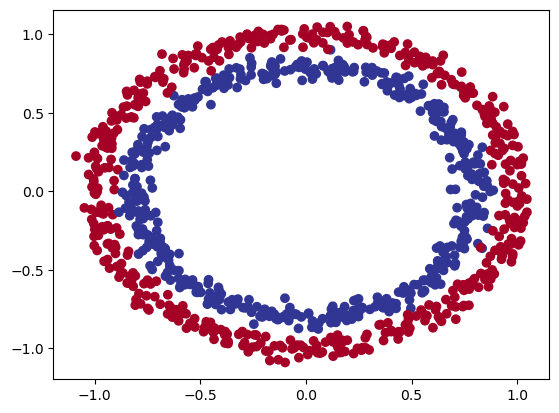

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.04, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu) 

In [4]:
from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

torch.Size([800, 2])

In [6]:
from torch import nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1= nn.Linear(in_features=2,out_features=10)
        self.layer_2= nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu= nn.ReLU()
    def forward(self,x):
        # output1 = self.relu(self.layer_1(x))
        # output2 = self.relu(self.layer_1(output1))
        # output3 = self.layer_3(output2)
        # return output3
        # Another way
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [7]:
model = CircleModel()
print(model.state_dict())

OrderedDict({'layer_1.weight': tensor([[-0.0876, -0.0227],
        [-0.2930,  0.5206],
        [-0.1798,  0.6754],
        [-0.1135,  0.0831],
        [-0.0721, -0.2794],
        [ 0.2520, -0.5767],
        [ 0.0567,  0.6258],
        [-0.5661,  0.1124],
        [ 0.5671, -0.1959],
        [-0.5010, -0.4841]]), 'layer_1.bias': tensor([-0.2851, -0.0664, -0.1076, -0.0144,  0.4067,  0.4453,  0.5581, -0.0053,
         0.6971,  0.2963]), 'layer_2.weight': tensor([[ 0.1235,  0.0348,  0.1408,  0.3032,  0.2426, -0.1229,  0.1066,  0.0053,
         -0.0221, -0.0066],
        [ 0.1211, -0.0109, -0.0460, -0.1379, -0.1104, -0.2145, -0.2347, -0.2289,
         -0.2940, -0.2094],
        [ 0.0154, -0.2860, -0.1980,  0.2490,  0.2871, -0.2111, -0.2635,  0.0401,
         -0.2595, -0.0849],
        [-0.0983,  0.0262, -0.2603, -0.1918,  0.1086,  0.1296,  0.2102,  0.2452,
          0.2997, -0.2390],
        [ 0.1049, -0.2856, -0.1777,  0.1810,  0.3134, -0.2318, -0.2974, -0.1389,
          0.2839,  0.0290],


In [8]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [9]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc


In [10]:
epochs = 5000
train_loss_list= []
test_loss_list = []
torch.manual_seed(42)
# Cast the model and data to the device
model.to(device)
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range (epochs):
#  Training
 model.train()

#  Forward pass
 y_logits = model(X_train).squeeze()
 y_pred = torch.round(torch.sigmoid(y_logits))

#  Compute loss
 loss = loss_fn(y_logits,y_train)
 acc = accuracy_fn(y_true=y_train,y_pred= y_pred)
#  Optimiser
 optimizer.zero_grad()

#  Backpropagate
 loss.backward()

#  Step the optimizer
 optimizer.step()

# TEsting
 model.eval()
 with torch.inference_mode():
   test_logits = model(X_test).squeeze()
   test_preds = torch.round(torch.sigmoid(test_logits))
   test_loss = loss_fn(test_logits,y_test)
   test_acc = accuracy_fn(y_true=y_test,y_pred=test_preds)

 train_loss_list.append(loss.item())
 test_loss_list.append(test_loss.item())
 if (epoch+1) % 100 == 0:
   print(f'Epoch {epoch+1}`)| Loss{loss:.5f} | Acc {acc:.2f}|Test Loss {test_loss:.5f}| Test Acc {test_acc:.2f}')







Epoch 100`)| Loss0.69426 | Acc 50.00|Test Loss 0.69426| Test Acc 50.00
Epoch 200`)| Loss0.69295 | Acc 50.00|Test Loss 0.69321| Test Acc 50.00
Epoch 300`)| Loss0.69227 | Acc 50.00|Test Loss 0.69274| Test Acc 50.00
Epoch 400`)| Loss0.69183 | Acc 48.00|Test Loss 0.69248| Test Acc 48.00
Epoch 500`)| Loss0.69150 | Acc 50.38|Test Loss 0.69231| Test Acc 45.50
Epoch 600`)| Loss0.69122 | Acc 50.88|Test Loss 0.69217| Test Acc 46.00
Epoch 700`)| Loss0.69096 | Acc 52.12|Test Loss 0.69205| Test Acc 49.50
Epoch 800`)| Loss0.69071 | Acc 52.75|Test Loss 0.69194| Test Acc 53.00
Epoch 900`)| Loss0.69047 | Acc 54.12|Test Loss 0.69183| Test Acc 54.50
Epoch 1000`)| Loss0.69023 | Acc 55.00|Test Loss 0.69172| Test Acc 55.00
Epoch 1100`)| Loss0.68999 | Acc 55.50|Test Loss 0.69160| Test Acc 55.00
Epoch 1200`)| Loss0.68974 | Acc 56.38|Test Loss 0.69148| Test Acc 55.50
Epoch 1300`)| Loss0.68949 | Acc 56.50|Test Loss 0.69135| Test Acc 56.50
Epoch 1400`)| Loss0.68924 | Acc 56.88|Test Loss 0.69122| Test Acc 56.50
E

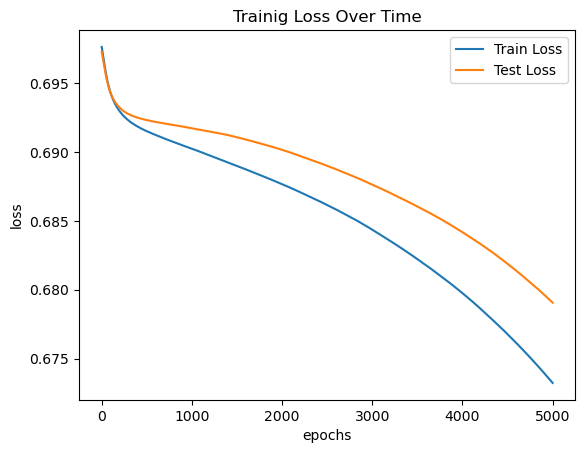

In [11]:
plt.plot(range(epochs),train_loss_list,label= "Train Loss")
plt.plot(range(epochs),test_loss_list,label= "Test Loss")
plt.title("Trainig Loss Over Time")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()



